In [100]:
import numpy as np
import pandas as pd
from datetime import datetime
import pickle
import scipy.stats as st
import matplotlib.pyplot as plt

In [150]:
ticks = ['AAPL', 'C', 'GBX', 'SPY', 'THO']
stocks = []
for tick in ticks:
    with open(tick, 'rb') as file:
        stocks.append(pickle.load(file))
        
df = pd.DataFrame.from_dict(stocks[0][0][1], orient='index')
print(len(stocks[0]))
print(len(stocks[0][0][1]))
for i in stocks[0]:
    print(i[0])

print(stocks[0][0][0])
print(df)

390
3638
34260
34320
34380
34440
34500
34560
34620
34680
34740
34800
34860
34920
34980
35040
35100
35160
35220
35280
35340
35400
35460
35520
35580
35640
35700
35760
35820
35880
35940
36000
36060
36120
36180
36240
36300
36360
36420
36480
36540
36600
36660
36720
36780
36840
36900
36960
37020
37080
37140
37200
37260
37320
37380
37440
37500
37560
37620
37680
37740
37800
37860
37920
37980
38040
38100
38160
38220
38280
38340
38400
38460
38520
38580
38640
38700
38760
38820
38880
38940
39000
39060
39120
39180
39240
39300
39360
39420
39480
39540
39600
39660
39720
39780
39840
39900
39960
40020
40080
40140
40200
40260
40320
40380
40440
40500
40560
40620
40680
40740
40800
40860
40920
40980
41040
41100
41160
41220
41280
41340
41400
41460
41520
41580
41640
41700
41760
41820
41880
41940
42000
42060
42120
42180
42240
42300
42360
42420
42480
42540
42600
42660
42720
42780
42840
42900
42960
43020
43080
43140
43200
43260
43320
43380
43440
43500
43560
43620
43680
43740
43800
43860
43920
43980
44040
44100
4

In [151]:
class OrderBook:
    
    def __init__(self, data, lower, upper):
        self.time = data[0]
        self.lower = lower
        self.upper = upper
        header = ['Quantity', 'Position', 'pass1', 'pass2']
        df = pd.DataFrame.from_dict(data[1], orient='index', columns = header)
        df.drop(['pass1', 'pass2'], axis = 1, inplace = True)
        self.data = df
        
        # divide based on position
        self.buyers = df[df['Position'] == 'B'].sort_index(ascending = False)
        self.sellers = df[df['Position'] == 'S'].sort_index()
        self.buyers['TotDem'] = -self.buyers['Quantity'].cumsum()
        self.buyers = self.buyers.sort_index()
        self.sellers['TotSup'] = self.sellers['Quantity'].cumsum()
        
        # finding the orders
        orders = pd.concat([self.buyers, self.sellers], sort=True)
        orders = orders.fillna(0)
        orders['Tot'] = orders['TotDem'] + orders['TotSup']
        self.midpoint = orders[orders.Tot < 0].index.values[-1]
        self.orders = orders[(orders.index > self.midpoint * lower) & 
                             (orders.index < self.midpoint * upper)]
        
        self.Q = self.orders['Tot']
        self.P = self.orders.index.values
        
    def __str__(self):
        rv = []
        rv.append("Time: {}".format(self.time))
        rv.append("Midpoint Multiplier Range: [{}, {}]".format(self.lower, self.upper))
        rv.append("Midpoint: {}".format(self.midpoint))
        rv.append("Orderbook: \n {}".format(self.orders[abs(self.orders.index - self.midpoint) < .3]))
        return "\n".join(rv)
    
    def estimation(self):
        beta, gamma, r_value, p_value, std_err = st.linregress(self.P, self.Q)
        self.beta = beta 
        self.gamma = gamma
        self.R2 = r_value
        self.p = - (gamma / beta)
        #print("Gamma: ", gamma)
        #print("Beta: ", beta)
        #print("R-squared", r_value)
        #print("Q = {} + {}*P".format(gamma, beta))
        
    def plotfunc(self):
        fig = plt.figure(figsize = (12, 12))
        sub1 = fig.add_subplot(2, 1, 1)
        sub1.plot(self.buyers.index.values, -self.buyers['TotDem'], label = "Q Demanded at Price")
        sub1.plot(self.sellers.index.values, self.sellers['TotSup'], label = "Q Supplied at Price")
        plt.xlim(0.5 * self.midpoint, 1.5 * self.midpoint)
        plt.legend()
        plt.title("Orderbook at time {}".format(self.time))
        sub2 = fig.add_subplot(2,1,2)
        prices = np.linspace(min(self.orders.index.values), max(self.orders.index.values), 2000)
        sub2.plot(prices, self.gamma + self.beta * prices, label="OLS estimation")
        plt.title("Linear Regression Estimation for Supply Curve")
        sub2.legend()
        plt.show()

          

    

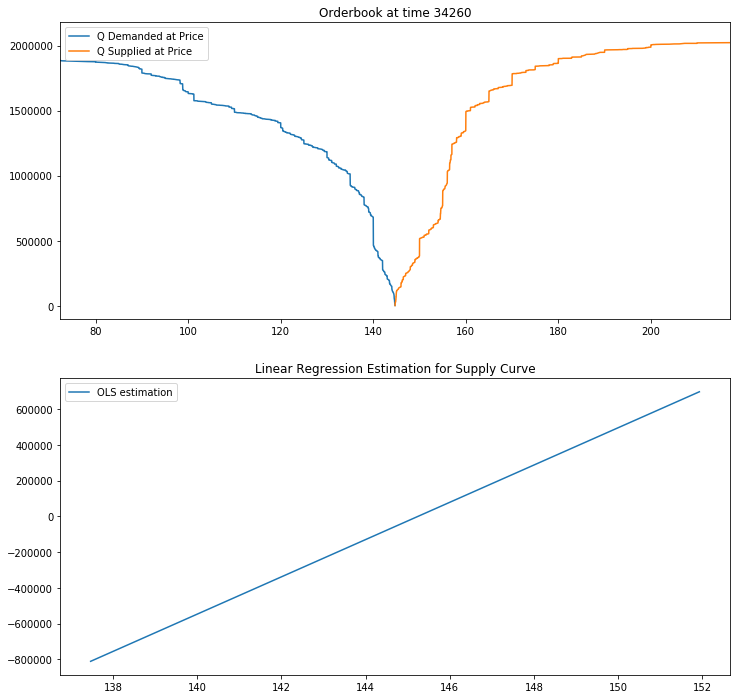

Time: 34260
Midpoint Multiplier Range: [0.95, 1.05]
Midpoint: 144.7
Orderbook: 
        Position  Quantity   TotDem    TotSup       Tot
144.40        B      2775 -96384.0       0.0  -96384.0
144.41        B       350 -93609.0       0.0  -93609.0
144.42        B       821 -93259.0       0.0  -93259.0
144.43        B       440 -92438.0       0.0  -92438.0
144.44        B      2025 -91998.0       0.0  -91998.0
144.45        B      1500 -89973.0       0.0  -89973.0
144.46        B       962 -88473.0       0.0  -88473.0
144.47        B       302 -87511.0       0.0  -87511.0
144.48        B      1200 -87209.0       0.0  -87209.0
144.49        B      6100 -86009.0       0.0  -86009.0
144.50        B     18530 -79909.0       0.0  -79909.0
144.51        B      1391 -61379.0       0.0  -61379.0
144.52        B      1585 -59988.0       0.0  -59988.0
144.53        B      1844 -58403.0       0.0  -58403.0
144.54        B      2027 -56559.0       0.0  -56559.0
144.55        B      2118 -54532.0     

In [152]:
x = OrderBook(stocks[0][0], .95, 1.05)
x.estimation()
x.plotfunc()
print(x)

Stock: AAPL
Stock: C
Stock: GBX
Stock: SPY
Stock: THO


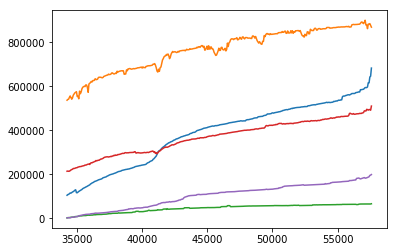

In [153]:
for i, file in enumerate(stocks): 
    betas = []
    time = []
    print("Stock: {}".format(ticks[i]))
    for record in file:
        tick = OrderBook(record, .95, 1.05)
        tick.estimation()
        betas.append(tick.beta)
        time.append(tick.time)
    plt.plot(time, betas, label = "{}".format(ticks[i]))

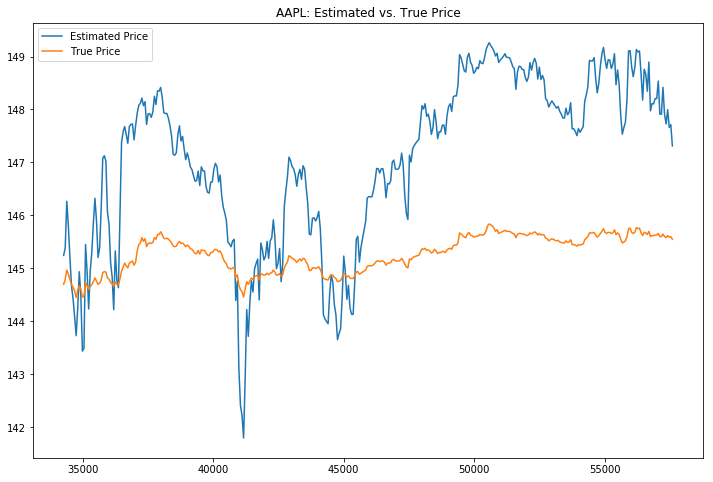

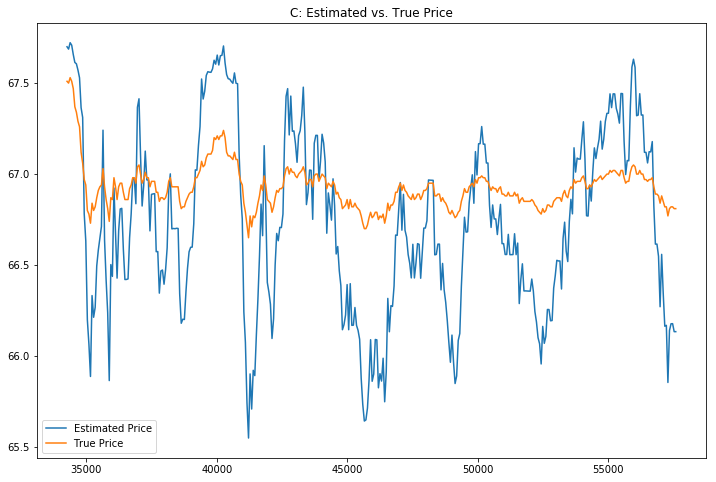

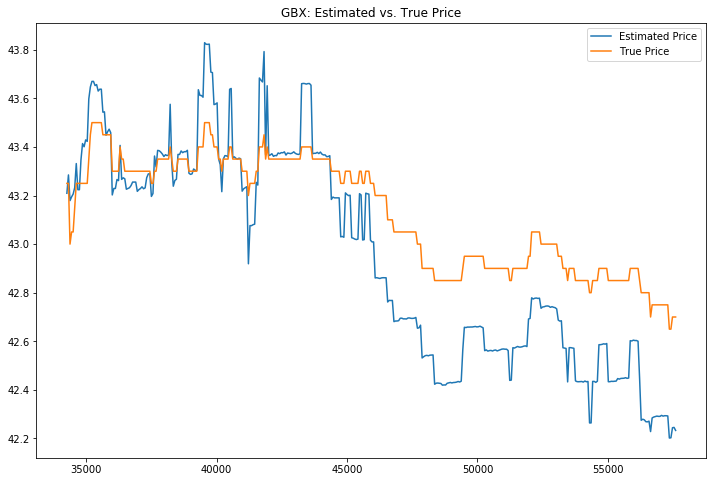

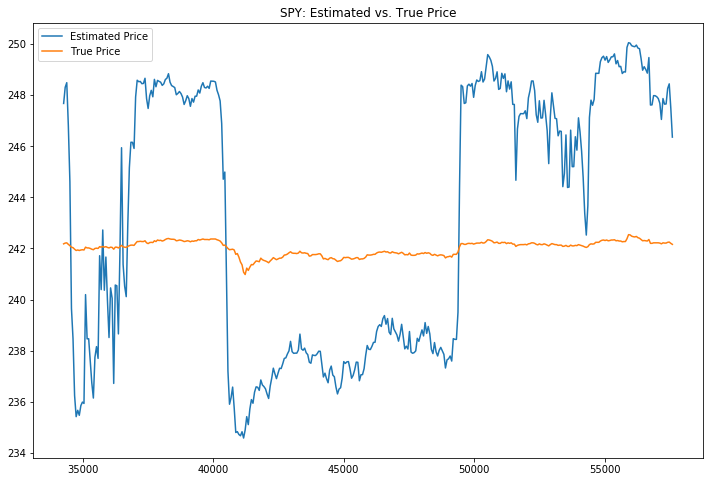

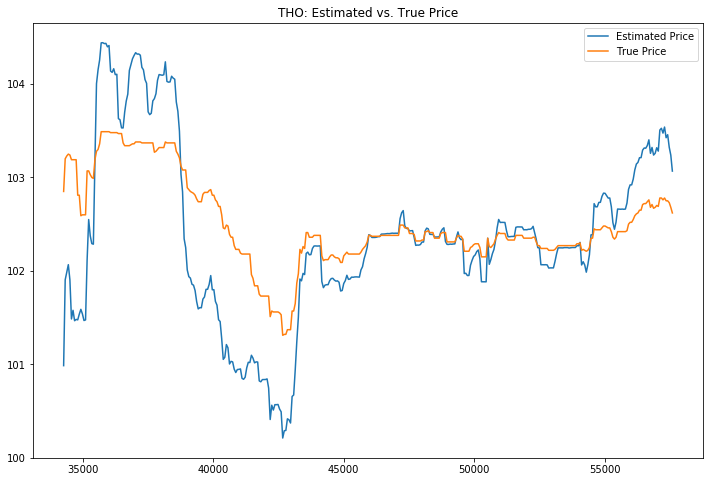

In [160]:
def Compare(stock, stockname, plot=False):
    est = np.zeros(len(stock), dtype = float)
    act = np.zeros(len(stock), dtype = float)
    time = np.zeros(len(stock))
    for i, tick in enumerate(stock):
        book = OrderBook(tick, .95, 1.05)
        book.estimation()
        act[i] = book.midpoint
        est[i] = book.p
        time[i] = book.time
        
    if plot:
        fig = plt.figure(figsize = (12, 8))
        plt.plot(time, est, label = "Estimated Price")
        plt.plot(time, act, label = "True Price")
        plt.legend()
        plt.title("{}: Estimated vs. True Price".format(stockname))
        '''
        sub2 = fig.add_subplot(2, 1, 2)
        sub2.plot(time, est-act, label = "Difference")
        plt.legend()
        plt.title("Difference in Estimation vs. True")
        '''
    return act, est

for i, stock in enumerate(stocks):
    rv = Compare(stock, ticks[i], True) 


What we see is that the estimates are far more volatile across the board then the true prices but consistently track according to the true price. Moreover while the estimations are more volatile than the true prices, this is only true to a degree as they consistently stay relatively close to the true price and track with it's general trend. In part this is likly because when the market shifts, traders shift their position to reflect their view of the market which changes the regression results more quickly than the price itself which is representative of true orders not hypothetical orders. 